## Introduction to Python

Materials are partially based on [Neural Signal Processing (UCSD COGS118C)](https://github.com/rdgao/COGS118C) by Richard Gao (see the [LICENSE](https://github.com/rdgao/COGS118C/blob/master/LICENSE)).

*This is an optional notebook - if you already know the basics of Python, you can skip it.*

### Jupyter Notebook

Jupyter is an interactive interface that runs a Python "kernel" in the background (there are also kernels for other programming languages, see [the whole list](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)). Each cell can be run (executed) separately, but they use the same environment, i.e., they are not independent. If you initialize and do some operations on a variable in one cell, and change it in another, that will affect the initial cell.

When kernel dies (or when you restart it manually), the whole environment is cleared, so at the end, you can kill the notebook and re-run everything to make sure that everything is fine.

Some nifty shortcuts:
- **Enter** to enter *edit* mode (can enter text); **ESC** to enter *command* mode.
- In *command* mode:
    - **A** to open a new cell above, **B** to open one below, **X** to delete current cell.
    - **M** to change the cell to *Markdown* (fancy text, non-executable). You can simply enter text in these cells (or use [more advanced formatting](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)).
- **Shift+Enter** to run a cell, which will execute the code, or set the Markdown text.

For more shortcuts press **Ctrl+M H** (or select the proper option from the menu).

**Task 1:** Edit the cell below and put there some IT joke!

The Programmers' Credo: we do these things not because they are easy, but because we thought they were going to be easy.

### Python Crash Course

Below are key Python concepts that we will use later.  
If you want to know more, see, e.g., [Learning Python (pdf)](https://cfm.ehu.es/ricardo/docs/python/Learning_Python.pdf), [(official) Python tutorial](https://docs.python.org/3/tutorial/).

First, types:

In [1]:
# This is a comment
# print() and type() are both native python functions
print(type(6))    # this is an integer
print(type(6.0))  # this is a float
print(type(True)) # this is a boolean
print(type('this is a string.')) # this is a string

<class 'int'>
<class 'float'>
<class 'bool'>
<class 'str'>


Variables:

In [2]:
a = 5   # assign the value 5 to the variable a
b = 6.7 # similarly...

print(a)
print(b)
print(a==b)

a = b
print(a)
print(a==b)

5
6.7
False
6.7
True


Lists:

In [3]:
# define a list (in a notation similar to Prolog, Matlab/Octave)
my_list = [1,2,3,4,5,6,7]
print(my_list)

# define a second list
my_other_list = [11,12,13,14,15,16,17]
print(my_other_list)

# now, add the two lists together (the result is concatenation, not the sumation; we need other tools)
my_list + my_other_list
print(my_list+my_other_list)

# Python is strongly typed, so if you concatenate non-string with a string,
# there is a need to do the conversion explicitely
print("My list: " + str(my_list))
print("Length of my list: " + str(len(my_list)))

[1, 2, 3, 4, 5, 6, 7]
[11, 12, 13, 14, 15, 16, 17]
[1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17]
My list: [1, 2, 3, 4, 5, 6, 7]
Length of my list: 7


### Arrays with [NumPy](https://numpy.org/)
`numpy` is a powerful computational library for Python - whole range of computational libraries (incl. signal processing ones) is based on it, so we need to get familiar with it.

In [4]:
# import our first library!
# "import as" simply creates a short name for library
# (there are some conventions, e.g., numpy is always imported as np)

import numpy as np
print(np)

<module 'numpy' from 'C:\\Users\\maury\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>


Now, we can convert our lists into `numpy` arrays.

In [5]:
my_arr = np.array(my_list)
print(my_arr, type(my_arr))

my_arr2 = np.array(my_other_list)

# now let's try adding them (element-wise) again.
print('Adding:')
print(my_arr + my_arr2)

# we can also element-wise multiply them
print('Multiplying:')
print(my_arr*my_arr2)

[1 2 3 4 5 6 7] <class 'numpy.ndarray'>
Adding:
[12 14 16 18 20 22 24]
Multiplying:
[ 11  24  39  56  75  96 119]


**Task 2:** Basis Vectors in 2-dimension  
1. In the cell below, create two (numpy) variables that represent two different vectors, the [2-dimensional standard bases i and j](https://en.wikipedia.org/wiki/Standard_basis).
1. Then, perform vector addition using them by adding them together.

In [6]:
basis_x = np.array([1, 2])
basis_y = np.array([2, 3])

my_vec = basis_x + basis_y
print(my_vec) # print the result of their summation

[3 5]


### Indexing, length, and summation of an array
To access a particular element of an array, use square brackets. Python uses 0-indexing, meaning the first element is accessed with the index 0.

In [7]:
print(my_arr[0])
print(my_arr[-1])

1
7


In [8]:
# two ways of finding the length of an array

print(my_arr)
print(len(my_arr)) # len() is a native python function
print(my_arr.shape[0]) # .shape is a property of numpy arrays only

[1 2 3 4 5 6 7]
7
7


In [9]:
# two ways of finding the summation of an array
# note that this means adding together all the elements inside a single array
print(sum(my_arr)) # len() is a native python function
print(my_arr.sum())# .sum() is a property of numpy arrays only

28
28


**Task 3:** Functions and for loops  
1. To brush up your python, create your own function that returns the summation of an array, **using only a for-loop**!
1. Confirm that they return the same result as above.

In [10]:
# The range() function can be useful to create an iterating variable.
# If you need to iterate through all the elements of an array, simply combine range() and len() functions
print(range(6))

range(0, 6)


In [13]:
# Note that there are various ways to solve this problem, there's no correct solution.
# It's okay if your solution is different or more/less elegant, this is just to gauge that you
# have the prerequisite exposure for coding algorithms
def my_sum(arr):
    sum = 0
    for i in range(len(arr)):
        sum += arr[i]
    return sum

print(my_sum(my_arr))

28


### Computational efficiency

In Python we have many ways to process lists. The choice matters!

In [14]:
# we will compute the timings, so we need this module
import time

# get the random number generator
rng = np.random.default_rng()
# generate a list with 10.000.000 of integers
# (only 0 or 1 values are generated)
long_list = rng.integers(2, size=10000000)

# Count the ones in the long_list:

# 1st approach
print('1st approach:')
start = time.time()
print(len(long_list[long_list==1]))
stop = time.time()
print('Execution time: ' + str(stop-start) + '\n')

# 2nd approach
print('2nd approach:')
start = time.time()
print(sum([1 for item in long_list if item == 1]))
stop = time.time()
print('Execution time: ' + str(stop-start) + '\n')

# 3rd approach
print('3rd approach:')
start = time.time()
s = 0
for item in long_list:
    if item == 1: s+=1
print(s)
stop = time.time()
print('Execution time: ' + str(stop-start))

1st approach:
4998787
Execution time: 0.047757863998413086

2nd approach:
4998787
Execution time: 0.7633860111236572

3rd approach:
4998787
Execution time: 1.153841495513916


If a function already exists - use it! Your version will hardly be as effective as the library one ;)

**Task 4**: Compare the execution time of `my_mean()` and `np.mean()` functions (calculate the mean of the `long_list`)

In [15]:
def my_mean(list):
    return sum(list)/len(list)

start = time.time()
print(my_mean(long_list))
stop = time.time()
print('Execution time: ' + str(stop-start) + '\n')

start = time.time()
print(np.mean(long_list))
stop = time.time()
print('Execution time: ' + str(stop-start) + '\n')

0.4998787
Execution time: 0.48000168800354004

0.4998787
Execution time: 0.006544589996337891



### Dictionaires

Dictionaries are associative arrays:

In [16]:
dict = {'Name': 'John',
        'Surname': 'Smith',
        'Age': 21,
        'Class': 'Introduction to Python'}

dict['Age'] = 22                     # Update existing entry
dict['School'] = "Jagiellonian Uni"  # Add new entry

# f-Strings are cool! :)
print(f"dict['Age']: {dict['Age']}")
print(f"dict['School']: {dict['School']}")

dict['Age']: 22
dict['School']: Jagiellonian Uni


### External files

In [17]:
# Download the dataset (to Virtual Machine local filesystem)
# If it does not work, you can upload the file manually
#    using the Files panel on the left side
!wget https://krzysztof.kutt.pl/didactics/psaw/kc_house_data_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### DataFrames from [pandas](https://pandas.pydata.org/)

The primary library for processing datasets is [pandas](https://pandas.pydata.org/), and its basic class is the DataFrame (an array on steroids)

In [18]:
import pandas as pd

# load the dataset into DataFrame
df = pd.read_csv('kc_house_data_train.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8077200360,20141112T000000,557865.0,4,2.50,3030,6813,2.0,0,0,...,9,3030,0,1987,0,98074,47.6296,-122.029,2310,8682
1,629650030,20150312T000000,317500.0,4,2.50,2233,6025,2.0,0,0,...,7,2233,0,2012,0,98001,47.2599,-122.256,1544,6036
2,9406510040,20150206T000000,555000.0,4,2.50,2920,24074,2.0,0,0,...,9,2920,0,1997,0,98038,47.3810,-122.056,2760,26023
3,7224000545,20140825T000000,370000.0,4,3.00,2130,4838,1.5,0,0,...,7,2130,0,1930,0,98055,47.4871,-122.203,1070,4838
4,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,1200,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,1775801340,20140606T000000,415000.0,3,1.75,1910,12596,1.0,0,0,...,7,1340,570,1977,0,98072,47.7399,-122.099,1550,13310
17286,3741600020,20140915T000000,540000.0,3,2.25,2100,20018,1.0,0,4,...,8,1470,630,1948,0,98166,47.4544,-122.366,2410,17196
17287,8934100125,20140829T000000,810000.0,3,2.00,2870,6360,1.5,0,1,...,8,1790,1080,1946,0,98115,47.6813,-122.275,2310,6466
17288,5104520550,20140701T000000,357500.0,3,3.50,2080,5100,2.0,0,0,...,8,2080,0,2004,0,98038,47.3500,-122.005,2080,5100


<Axes: xlabel='sqft_living', ylabel='price'>

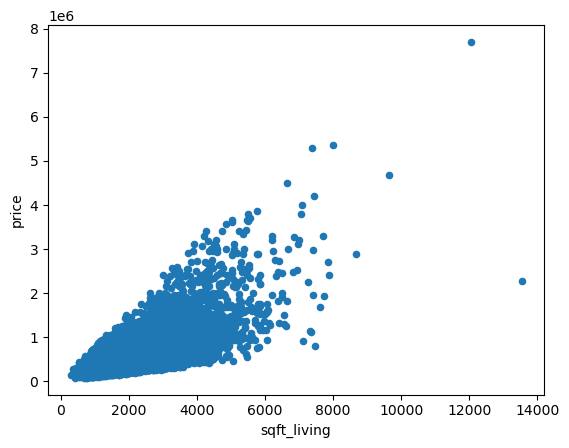

In [19]:
# to select one column:
bedrooms = df['sqft_living']

# to select two or more columns, use a list inside square brackets:
bedprice = df[['sqft_living', 'price']]

# DataFrame has built-in methods for plots:
bedprice.plot.scatter(x='sqft_living', y='price')

In [20]:
# Select something by index
print('Here is what we have at the index 1210: ')
print('\n -- loc[1210]')
print(bedprice.loc[1210])  # get by index
print('\n -- iloc[1210]')
print(bedprice.iloc[1210]) # get by row number

Here is what we have at the index 1210: 

 -- loc[1210]
sqft_living      1850.0
price          329000.0
Name: 1210, dtype: float64

 -- iloc[1210]
sqft_living      1850.0
price          329000.0
Name: 1210, dtype: float64


In [21]:
# index is not always the same as the row number:

bedprice.set_index('sqft_living', inplace=True)

print('Here is what we have at the index 1210: ')
print('\n -- loc[1210]')
print(bedprice.loc[1210])  # get by index
print('\n -- iloc[1210]')
print(bedprice.iloc[1210]) # get by row number

Here is what we have at the index 1210: 

 -- loc[1210]
                price
sqft_living          
1210         461100.0
1210         335000.0
1210         315000.0
1210         710000.0
1210         219950.0
...               ...
1210         351358.0
1210         279000.0
1210         173250.0
1210         269000.0
1210         456200.0

[69 rows x 1 columns]

 -- iloc[1210]
price    329000.0
Name: 1850, dtype: float64


In [22]:
# Iteration over rows in DataFrame

bedprice = df[['sqft_living', 'price']][:10].copy()

# This is not what we wanted (we iterate over column names)
for row in bedprice:
  print(f"[1st method] sqft_living: {str(row[0])}, price: {str(row[1])}")

# nice and comfortable
for idx, row in bedprice.iterrows():
  print(f"[iterrows()] sqft_living: {str(row['sqft_living'])}, price: {str(row['price'])}")

# sometimes much faster than the above
for row in bedprice.itertuples():
  print(f"[itertuples()] sqft_living: {str(getattr(row,'sqft_living'))}, price: {str(getattr(row,'price'))}")


[1st method] sqft_living: s, price: q
[1st method] sqft_living: p, price: r
[iterrows()] sqft_living: 3030.0, price: 557865.0
[iterrows()] sqft_living: 2233.0, price: 317500.0
[iterrows()] sqft_living: 2920.0, price: 555000.0
[iterrows()] sqft_living: 2130.0, price: 370000.0
[iterrows()] sqft_living: 2420.0, price: 700000.0
[iterrows()] sqft_living: 1330.0, price: 234999.0
[iterrows()] sqft_living: 3320.0, price: 679990.0
[iterrows()] sqft_living: 1270.0, price: 440000.0
[iterrows()] sqft_living: 1260.0, price: 336000.0
[iterrows()] sqft_living: 1220.0, price: 251000.0
[itertuples()] sqft_living: 3030, price: 557865.0
[itertuples()] sqft_living: 2233, price: 317500.0
[itertuples()] sqft_living: 2920, price: 555000.0
[itertuples()] sqft_living: 2130, price: 370000.0
[itertuples()] sqft_living: 2420, price: 700000.0
[itertuples()] sqft_living: 1330, price: 234999.0
[itertuples()] sqft_living: 3320, price: 679990.0
[itertuples()] sqft_living: 1270, price: 440000.0
[itertuples()] sqft_livi

### Fancy plots!

You can use classic plots by [matplotlib](https://matplotlib.org/). But, there is also **cool** [bokeh](https://bokeh.org/) library! 😉

In [23]:
# import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

# import bokeh
import bokeh.io, bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

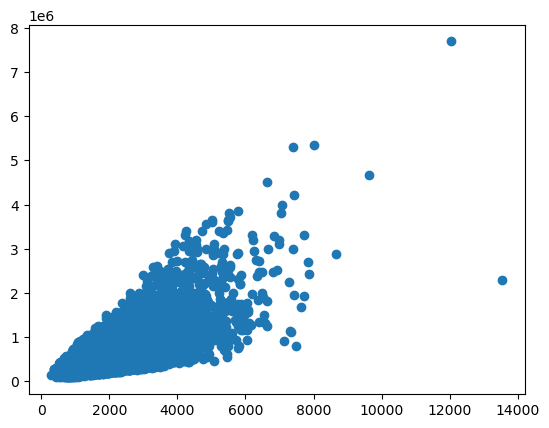

In [24]:
# plot with matplotlib
plt.scatter(df['sqft_living'], df['price'])

In [27]:
# the same data, but more fancy plot with bokeh (you can zoom, move, export, and more!)
bf = bokeh.plotting.figure(width=500, height=400)
bf.scatter(df['sqft_living'], df['price'])
bokeh.plotting.show(bf)